In [1]:
import os
import pandas as pd

# Set path to your dataset folder (adjust if needed)
DATA_DIR = "/kaggle/input/real-life-deception-detection-dataset"

# List all files
files = []
for root, _, filenames in os.walk(DATA_DIR):
    for f in filenames:
        if f.endswith(('.wav', '.mp4')):
            files.append(os.path.join(root, f))

# Preview
print("Total audio files found:", len(files))
print("Sample files:")
print("\n".join(files[:5]))


Total audio files found: 121
Sample files:
/kaggle/input/real-life-deception-detection-dataset/Real-life Deception Detection Dataset With Train Test/Test/trial_truth_056.mp4
/kaggle/input/real-life-deception-detection-dataset/Real-life Deception Detection Dataset With Train Test/Test/trial_lie_060.mp4
/kaggle/input/real-life-deception-detection-dataset/Real-life Deception Detection Dataset With Train Test/Test/trial_truth_057.mp4
/kaggle/input/real-life-deception-detection-dataset/Real-life Deception Detection Dataset With Train Test/Test/trial_lie_057.mp4
/kaggle/input/real-life-deception-detection-dataset/Real-life Deception Detection Dataset With Train Test/Test/trial_truth_060.mp4


In [2]:
# pip install scikit-learn==1.3.2


In [3]:
def get_label_from_filename(fname):
    fname = os.path.basename(fname).lower()
    if "truth" in fname:
        return 0  # Truth
    elif "lie" in fname or "false" in fname:
        return 1  # Lie
    return None  # Unknown

# Create DataFrame
data = pd.DataFrame({
    "file": files,
    "label": [get_label_from_filename(f) for f in files]
})

# Drop unknowns
data = data.dropna()
print(data.head())
print(data['label'].value_counts())


                                                file  label
0  /kaggle/input/real-life-deception-detection-da...      0
1  /kaggle/input/real-life-deception-detection-da...      1
2  /kaggle/input/real-life-deception-detection-da...      0
3  /kaggle/input/real-life-deception-detection-da...      1
4  /kaggle/input/real-life-deception-detection-da...      0
label
1    61
0    60
Name: count, dtype: int64


In [4]:
from moviepy.editor import VideoFileClip
import os

# Create a folder to save .wav files
os.makedirs("/kaggle/working/audio_wav", exist_ok=True)

def extract_audio(mp4_path):
    file_name = os.path.basename(mp4_path).replace(".mp4", ".wav")
    audio_path = os.path.join("/kaggle/working/audio_wav", file_name)

    video = VideoFileClip(mp4_path)
    audio = video.audio
    audio.write_audiofile(audio_path, codec='pcm_s16le')  # WAV format
    return audio_path

# Apply on all files
data['wav_file'] = data['file'].apply(extract_audio)

# Preview
data.head()


error: XDG_RUNTIME_DIR not set in the environment.
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default
ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evalu

MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_056.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_060.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_057.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_057.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_060.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_056.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_055.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_058.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_059.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_059.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_061.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_058.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_028.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_019.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_038.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_009.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_011.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_019.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_047.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_049.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_008.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_032.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_036.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_014.wav


MoviePy - Done.


MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_042.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_037.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_036.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_006.wav


MoviePy - Done.


MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_024.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_045.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_055.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_032.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_004.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_025.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_013.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_024.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_017.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_027.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_026.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_017.wav


MoviePy - Done.


MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_005.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_022.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_052.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_035.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_007.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_052.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_030.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_027.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_008.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_028.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_031.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_006.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_050.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_042.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_044.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_003.wav


MoviePy - Done.


MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_014.wav


MoviePy - Done.


MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_040.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_047.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_020.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_022.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_023.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_046.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_013.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_034.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_018.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_033.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_041.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_053.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_048.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_020.wav


MoviePy - Done.


MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_004.wav


MoviePy - Done.


MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_002.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_005.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_009.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_050.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_029.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_001.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_016.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_040.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_035.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_010.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_016.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_045.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_054.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_041.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_039.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_038.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_033.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_031.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_051.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_025.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_053.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_021.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_043.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_002.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_054.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_001.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_007.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_030.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_037.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_015.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_012.wav


MoviePy - Done.


MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_012.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_048.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_015.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_021.wav


MoviePy - Done.


MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_044.wav


MoviePy - Done.


MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_026.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_051.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_023.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_018.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_046.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_010.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_043.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_011.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_029.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_lie_003.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_039.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_049.wav


MoviePy - Done.
MoviePy - Writing audio in /kaggle/working/audio_wav/trial_truth_034.wav


MoviePy - Done.


,file,label,wav_file
0,/kaggle/input/real-life-deception-detection-da...,0,/kaggle/working/audio_wav/trial_truth_056.wav
1,/kaggle/input/real-life-deception-detection-da...,1,/kaggle/working/audio_wav/trial_lie_060.wav
2,/kaggle/input/real-life-deception-detection-da...,0,/kaggle/working/audio_wav/trial_truth_057.wav
3,/kaggle/input/real-life-deception-detection-da...,1,/kaggle/working/audio_wav/trial_lie_057.wav
4,/kaggle/input/real-life-deception-detection-da...,0,/kaggle/working/audio_wav/trial_truth_060.wav


In [5]:
import librosa
import numpy as np
from tqdm import tqdm
def extract_audio_features(file_path, sr=16000):
    y, _ = librosa.load(file_path, sr=sr)
    
    # Trim silence
    y, _ = librosa.effects.trim(y)
    
    # MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)

    # Pitch (using YIN)
    pitch = librosa.yin(y, fmin=50, fmax=300)
    pitch_mean = np.mean(pitch)
    pitch_std = np.std(pitch)

    # Energy
    energy = librosa.feature.rms(y=y)[0]
    energy_mean = np.mean(energy)
    energy_std = np.std(energy)

    return np.concatenate([
        mfcc_mean, mfcc_std,
        [pitch_mean, pitch_std],
        [energy_mean, energy_std]
    ])
features = []
labels = []

for _, row in tqdm(data.iterrows(), total=len(data)):
    f = extract_audio_features(row['wav_file'])
    features.append(f)
    labels.append(row['label'])

X = np.array(features)
y = np.array(labels)

print("Feature matrix shape:", X.shape)
print("Labels shape:", y.shape)


100%|██████████| 121/121 [00:26<00:00,  4.64it/s]

Feature matrix shape: (121, 30)
Labels shape: (121,)


In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Define base learners
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=500, random_state=42)

# Combine into voting ensemble (soft voting preferred)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('mlp', mlp)],
    voting='soft'  # use 'hard' for majority label voting
)

# Fit and evaluate
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.92      0.86        13

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25

Confusion Matrix:
[[ 9  3]
 [ 1 12]]


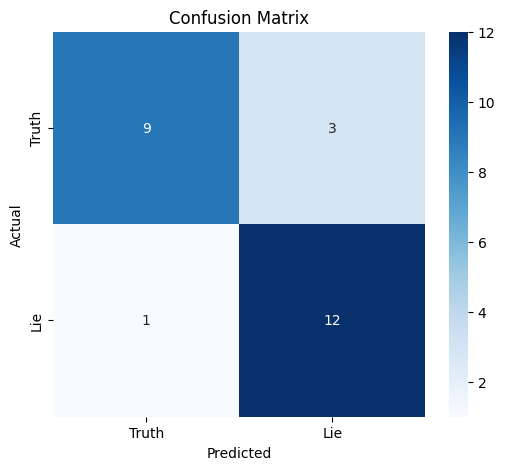

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = ['Truth', 'Lie']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


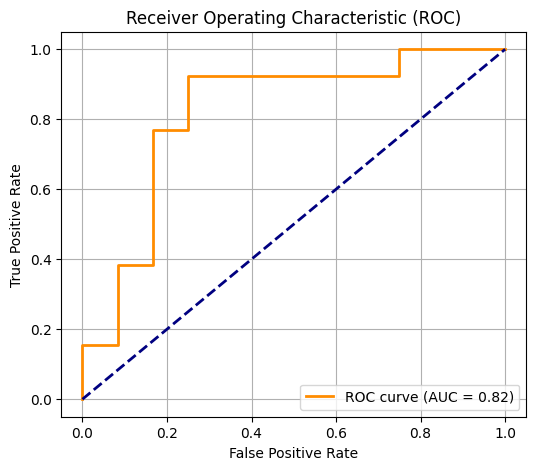

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# If you haven't done it yet
y_score = voting_clf.predict_proba(X_test)[:, 1]  # probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


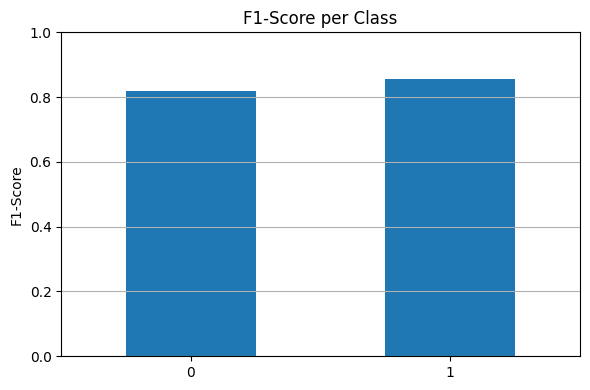

In [13]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Show barplot of F1-scores
df_report.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')[['f1-score']].plot(
    kind='bar', legend=False, title='F1-Score per Class', ylabel='F1-Score', figsize=(6, 4))
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [14]:
import joblib

# Save the model
joblib.dump(voting_clf, '/kaggle/working/deception_voting_model.pkl')


['/kaggle/working/deception_voting_model.pkl']